# Technical setup
> Skip this section

In [100]:
# @formatter:off

In [101]:
%%time
%reload_ext autoreload
%autoreload 2
# @formatter:on

CPU times: user 4.63 ms, sys: 8.19 ms, total: 12.8 ms
Wall time: 13.3 ms


# Parameters

In [102]:
symbol = 'ETHUSDT'
symbol_k_lines_interval = '1s'
symbol_ask_bid_price_difference = 0.01
price_step_ratio = 0.001

# Ticks

/Users/nikita/Documents/projects/things-team/to-the-moon/ttm-analytics/src/chart/ttm_chart.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=60)


,timestamp,bid_price,ask_price
0,1677628800000,1605.24,1605.25
1,1677628801000,1605.46,1605.47
2,1677628802000,1605.46,1605.47
3,1677628803000,1605.46,1605.47
4,1677628804000,1605.47,1605.48
...,...,...,...
86395,1681775995000,2074.00,2074.01
86396,1681775996000,2074.00,2074.01
86397,1681775997000,2074.00,2074.01
86398,1681775998000,2074.00,2074.01


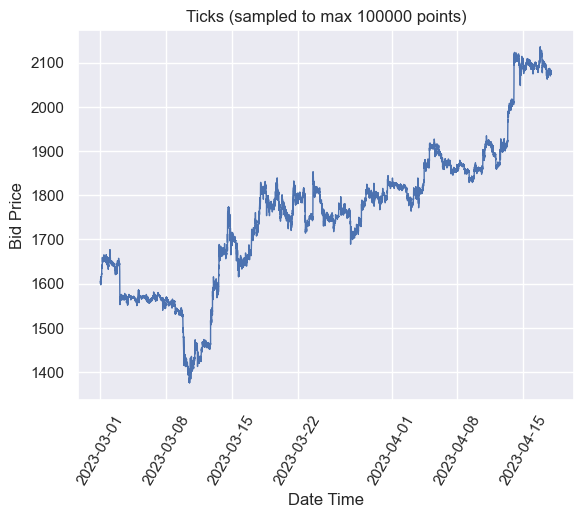

In [103]:
from IPython.core.display_functions import display

from binance.binance_k_line_loader import load_binance_k_lines
from binance.binance_tick_loader import load_binance_ticks
from chart.ttm_chart import draw_line_chart

k_lines = load_binance_k_lines(f"../../../ttm-data/{symbol}-{symbol_k_lines_interval}-*.csv")

ticks = load_binance_ticks(k_lines, symbol_ask_bid_price_difference)

draw_line_chart(ticks, 'timestamp', 'bid_price', 'Bid Price', 'Ticks')

display(ticks)

# Simulation Setup

In [104]:
# @formatter:off

In [105]:
%%time
# @formatter:on

from trade.trade_simulator import TradeSimulator

trade_simulator: TradeSimulator = TradeSimulator(ticks)

CPU times: user 51.4 s, sys: 767 ms, total: 52.2 s
Wall time: 52.3 s


# Simulation

Results: orders: 30,049, profit: -1199.56


/Users/nikita/Documents/projects/things-team/to-the-moon/ttm-analytics/src/chart/ttm_chart.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  plot.set_xticklabels(plot.get_xticklabels(), rotation=60)


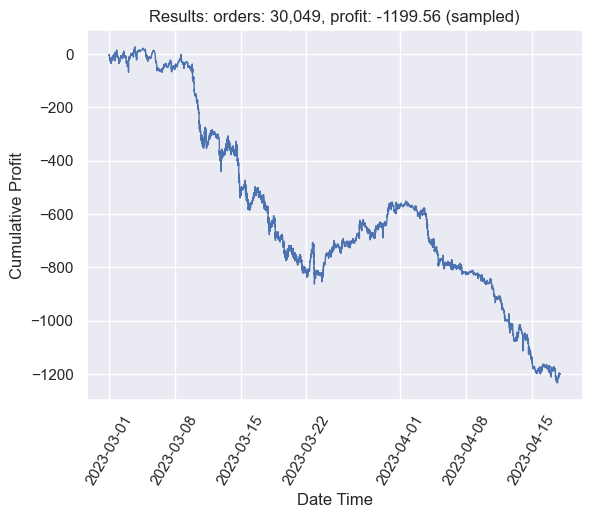

In [114]:
from analytics.bot_strategy_0 import BotStrategy0

trade_simulator.simulate(BotStrategy0(price_step_ratio))

# ============
# Closed orders count: 30049
# Cumulative profit: -1199.560000000114
# ============
result_str = (
    f"Results: orders: {len(trade_simulator.closed_orders):,}"
    f", profit: {trade_simulator.get_cumulative_profit():.2f}"
)
print(result_str)

profits = trade_simulator.get_profits()

draw_line_chart(profits, 'open_timestamp', 'cumulative_profit', 'Cumulative Profit', result_str)

# display(profits)